# **Executive Summary: Swing Trading Strategy Analysis**

# **Project Overview**

This project evaluates the performance of technical trading strategies using 5-minute Bitcoin data from October 25, 2022, to December 15, 2023. The focus is on implementing and testing a Swing Trading strategy based on swing high/low conditions identified through SQL queries. The strategy's effectiveness is measured using various combinations of parameters to identify the optimal settings.


**Data Summary**

The analysis uses 5-minute BTCUSD trading data extracted from an Excel file. The dataset includes columns such as high, low, open, close, volume, and date. We focus on data between October 25, 2022, and December 15, 2023, to implement and test the Swing Trading strategy, assuming a starting balance of 2,000 and a per-trade investment of $100.


# Strategy Implementation

**Swing Trading Strategy**

A swing trading strategy aims to capture gains by identifying potential swing high and swing low points. The identified swing points serve as buy and sell signals.


# **Key Components**

**Swing High/Low Identification:**

**A Swing High (SWH):** The highest high within a defined lookback and lookforward period.

**A Swing Low (SWL):** The lowest low within a defined lookback and lookforward period.

**SQL Query Implementation:**
The SQL query identifies swing high/low conditions using a rolling window approach over left_bars and right_bars.

**Entry Signals:**

**Long Entry:** Triggered when the high price exceeds the swing high price.

**Short Entry**: Triggered when the low price falls below the swing low price.

# **Performance Analysis**
The Swing Trading strategy was tested with the following parameters:

Initial Capital: $2000

Trade Size: $100

Max Investment: $2000

Take Profit (TP): 5%

Stop Loss (SL): 2%



**Results**

Final Portfolio Value: $2,747.78

Profit Percentage: 37.39%



### **Conclusion**

The Swing Trading strategy, when implemented on the BTCUSD pair using 5-minute data from October 25, 2022, to December 15, 2023, resulted in a final portfolio value of $2,747.78, with a profit percentage of 37.39%.

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Read the CSV file
data = pd.read_csv('/content/drive/My Drive/BTC_ETH.csv',skiprows=range(1, 163), nrows=115199)

# Print the data
print(data)

             low      high      open     close    volume              date  \
0       42955.46  43030.32  43030.32  42955.46  0.835345   12/15/2023 0:00   
1       43019.74  43035.72  43019.74  43024.90  0.114802  12/14/2023 23:55   
2       42988.60  43013.68  42988.60  43013.68  0.870160  12/14/2023 23:50   
3       42956.44  42991.75  42982.04  42979.75  2.168241  12/14/2023 23:45   
4       42962.05  42994.85  42963.97  42994.85  1.204057  12/14/2023 23:40   
...          ...       ...       ...       ...       ...               ...   
115194  19291.07  19298.07  19295.13  19293.69  0.546026   10/25/2022 0:20   
115195  19296.65  19317.71  19317.71  19299.59  1.487230   10/25/2022 0:15   
115196  19315.09  19332.93  19322.85  19317.71  0.799910   10/25/2022 0:10   
115197  19296.52  19323.00  19306.73  19316.79  6.134015   10/25/2022 0:05   
115198  19279.25  19338.35  19332.19  19291.37  4.650611   10/25/2022 0:00   

            pair  
0       BTC-USDT  
1       BTC-USDT  
2     

In [4]:
df = pd.DataFrame(data)

# Convert the 'Date_Time' column to datetime objects
df['Date_Time'] = pd.to_datetime(df['date'])

# Set the 'Date_Time' column as the index
df = df.set_index('Date_Time')

# Sort the index (dates and times)
df = df.sort_index()

# Print the dataframe
print(df)

                          low      high      open     close    volume  \
Date_Time                                                               
2022-10-25 00:00:00  19279.25  19338.35  19332.19  19291.37  4.650611   
2022-10-25 00:05:00  19296.52  19323.00  19306.73  19316.79  6.134015   
2022-10-25 00:10:00  19315.09  19332.93  19322.85  19317.71  0.799910   
2022-10-25 00:15:00  19296.65  19317.71  19317.71  19299.59  1.487230   
2022-10-25 00:20:00  19291.07  19298.07  19295.13  19293.69  0.546026   
...                       ...       ...       ...       ...       ...   
2023-12-14 23:40:00  42962.05  42994.85  42963.97  42994.85  1.204057   
2023-12-14 23:45:00  42956.44  42991.75  42982.04  42979.75  2.168241   
2023-12-14 23:50:00  42988.60  43013.68  42988.60  43013.68  0.870160   
2023-12-14 23:55:00  43019.74  43035.72  43019.74  43024.90  0.114802   
2023-12-15 00:00:00  42955.46  43030.32  43030.32  42955.46  0.835345   

                                 date      pair  


In [5]:
# Install SQLAlchemy if needed
!pip install SQLAlchemy

# **Detailed Explanation of the Swing Trading Strategy**
### **Concept Overview**

Swing trading is a strategy that aims to capture short- to medium-term gains by identifying price swings. These swings are peaks and troughs where price reversals occur, known as swing highs and swing lows. Traders use these points to enter and exit trades, often holding positions for several days or weeks.


### **Key Components**

**Swing High (SWH):**
A swing high is a peak price point within a defined window.
It represents a local maximum in the price series, surrounded by lower highs on either side.

### **Swing Low (SWL):**
A swing low is a trough price point within a defined window.
It represents a local minimum in the price series, surrounded by higher lows on either side.

### **Parameters:**

**Left Bars (Lookback Period):** The number of periods to look back from the current bar.

**Right Bars (Lookforward Period):** The number of periods to look ahead from the current bar.

### **Entry Signals:**

**Long Entry (Buy Signal):** When the price exceeds a previous swing high.

**Short Entry (Sell Signal):** When the price falls below a previous swing low.


### **Trade Execution:**

**Take Profit (TP):** The level of profit at which a position will be closed automatically.

**Stop Loss (SL):**The level of loss at which a position will be closed automatically.

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import matplotlib.pyplot as plt


# Ensure the DataFrame has the correct columns
df.reset_index(inplace=True)

# Create a connection to an in-memory SQLite database
engine = create_engine('sqlite://', echo=False)

# Write DataFrame to the SQL database
df.to_sql('stock_data', con=engine, index=False, if_exists='replace')

# SQL Query to calculate Swing High/Low conditions
left_bars = 5
right_bars = 5

sql_query = f"""
WITH
    high_conditions AS (
        SELECT
            stock_data.Date_Time,
            stock_data.High,
            stock_data.Low,
            stock_data.Open,
            stock_data.Close,
            stock_data.Volume,
            CASE
                WHEN stock_data.High >= MAX(stock_data.High) OVER (ORDER BY stock_data.Date_Time ROWS BETWEEN {left_bars} PRECEDING AND {right_bars} FOLLOWING)
                THEN 1 ELSE 0 END AS swh_cond
        FROM stock_data
    ),
    low_conditions AS (
        SELECT
            high_conditions.*,
            CASE
                WHEN high_conditions.Low <= MIN(high_conditions.Low) OVER (ORDER BY high_conditions.Date_Time ROWS BETWEEN {left_bars} PRECEDING AND {right_bars} FOLLOWING)
                THEN 1 ELSE 0 END AS swl_cond
        FROM high_conditions
    )
SELECT
    low_conditions.Date_Time,
    low_conditions.High,
    low_conditions.Low,
    low_conditions.Open,
    low_conditions.Close,
    low_conditions.Volume,
    low_conditions.swh_cond,
    low_conditions.swl_cond
FROM low_conditions
"""

# Execute SQL query and get DataFrame
swing_df = pd.read_sql_query(sql_query, con=engine)

# Fill in 'hprice' and 'lprice' with Pandas and NumPy
right_bars_shift = right_bars

swing_df['hprice'] = np.where(swing_df['swh_cond'], swing_df['High'], np.nan)
swing_df['hprice'] = swing_df['hprice'].fillna(method='ffill').shift(right_bars_shift).fillna(value=0)

swing_df['lprice'] = np.where(swing_df['swl_cond'], swing_df['Low'], np.nan)
swing_df['lprice'] = swing_df['lprice'].fillna(method='ffill').shift(right_bars_shift).fillna(value=0)

# Define minimum tick
min_tick = 0.0001

# Long crossover
swing_df['Long_entries'] = (swing_df['High'] >= swing_df['hprice'].shift(1) + min_tick) & \
                           (swing_df['High'].shift(1) < swing_df['hprice'].shift(2) + min_tick)

# Short crossover
swing_df['Short_entries'] = (swing_df['Low'] <= swing_df['lprice'].shift(1) - min_tick) & \
                            (swing_df['Low'].shift(1) > swing_df['lprice'].shift(2) - min_tick)

# Trade price
swing_df['trade_price'] = np.where(swing_df['Long_entries'], swing_df['hprice'] + min_tick,
                                   np.where(swing_df['Short_entries'], swing_df['lprice'] - min_tick, np.nan))

# Print the DataFrame
print(swing_df)




                         Date_Time      High       Low      Open     Close  \
0       2022-10-25 00:00:00.000000  19338.35  19279.25  19332.19  19291.37   
1       2022-10-25 00:05:00.000000  19323.00  19296.52  19306.73  19316.79   
2       2022-10-25 00:10:00.000000  19332.93  19315.09  19322.85  19317.71   
3       2022-10-25 00:15:00.000000  19317.71  19296.65  19317.71  19299.59   
4       2022-10-25 00:20:00.000000  19298.07  19291.07  19295.13  19293.69   
...                            ...       ...       ...       ...       ...   
115194  2023-12-14 23:40:00.000000  42994.85  42962.05  42963.97  42994.85   
115195  2023-12-14 23:45:00.000000  42991.75  42956.44  42982.04  42979.75   
115196  2023-12-14 23:50:00.000000  43013.68  42988.60  42988.60  43013.68   
115197  2023-12-14 23:55:00.000000  43035.72  43019.74  43019.74  43024.90   
115198  2023-12-15 00:00:00.000000  43030.32  42955.46  43030.32  42955.46   

          Volume  swh_cond  swl_cond    hprice    lprice  Long_

**Visualising the strategy**

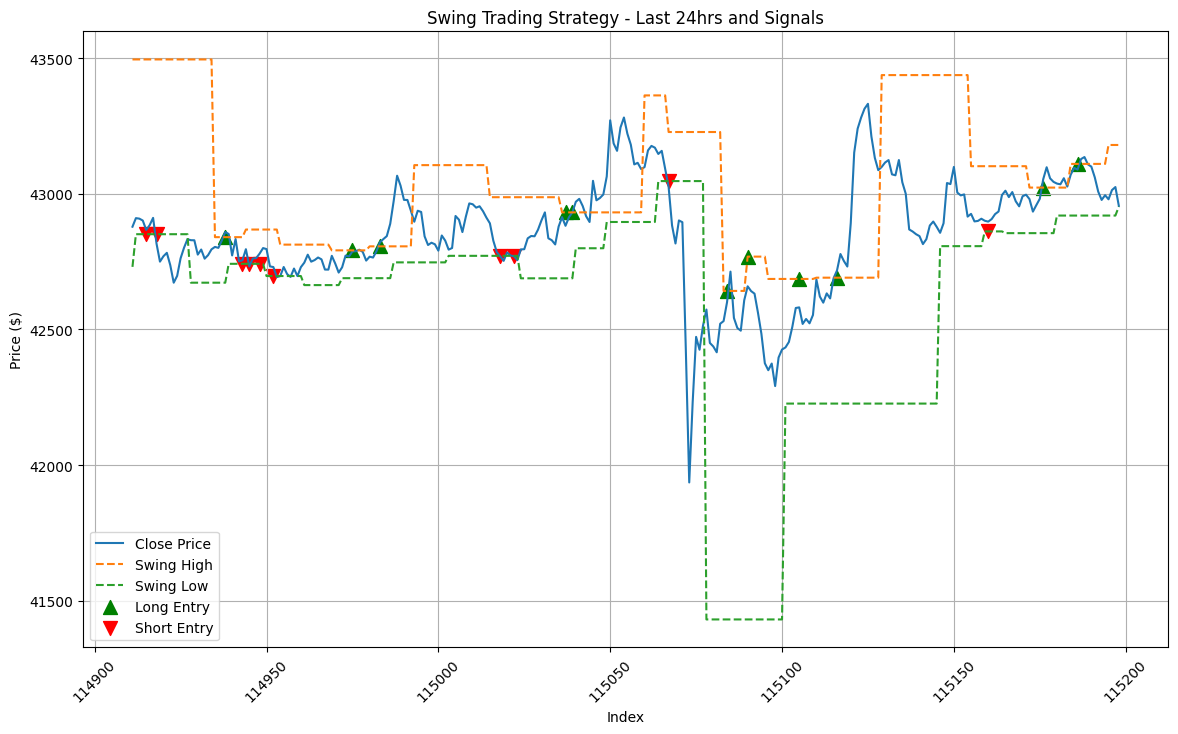

In [10]:
# Select the last 288 rows for visualization
plot_df = swing_df.tail(288)

# Plotting
plt.figure(figsize=(14, 8))
plt.plot(plot_df.index, plot_df['Close'], label='Close Price')
plt.plot(plot_df.index, plot_df['hprice'], label='Swing High', linestyle='--')
plt.plot(plot_df.index, plot_df['lprice'], label='Swing Low', linestyle='--')

# Plot the signals
plt.scatter(plot_df.loc[plot_df['Long_entries']].index, plot_df.loc[plot_df['Long_entries'], 'trade_price'],
            marker='^', color='green', label='Long Entry', s=100)
plt.scatter(plot_df.loc[plot_df['Short_entries']].index, plot_df.loc[plot_df['Short_entries'], 'trade_price'],
            marker='v', color='red', label='Short Entry', s=100)

plt.legend()
plt.xlabel('Index')
plt.ylabel('Price ($)')
plt.title('Swing Trading Strategy - Last 24hrs and Signals')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


Final Portfolio Value: $2747.78
Profit Percentage: 37.39%


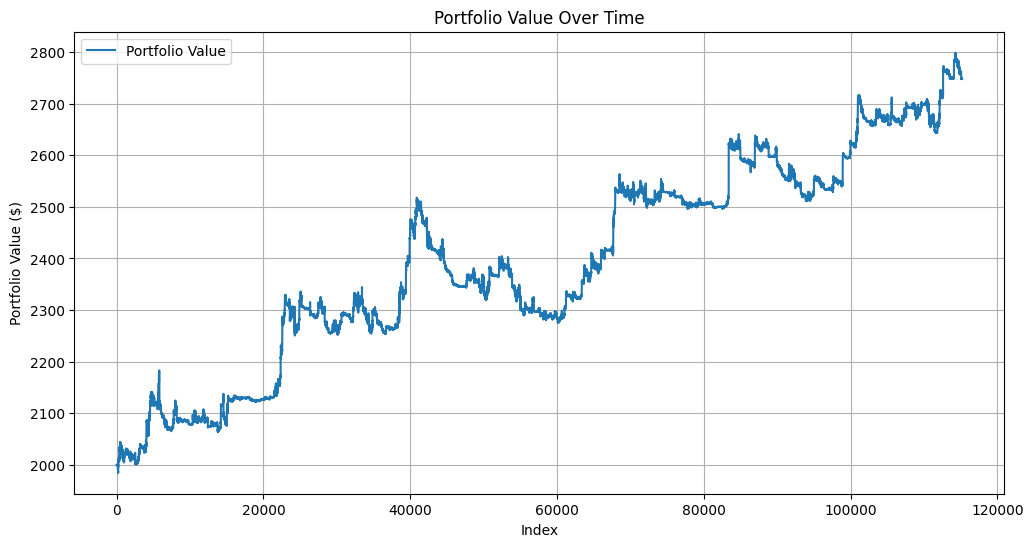

In [11]:
import matplotlib.pyplot as plt

# Backtesting strategy with Take Profit (TP) and Stop Loss (SL)
def backtest_strategy(df, initial_capital=2000, trade_size=100, max_investment=2000, tp=0.05, sl=0.02):
    cash = initial_capital
    positions = []  # List to hold active positions
    portfolio_values = []

    for index, row in df.iterrows():
        # Update the value of active positions and check for TP/SL conditions
        remaining_positions = []
        for position in positions:
            if position['type'] == 'long':
                position['current_value'] = trade_size * (row['Close'] / position['entry_price'])
                # Check Take Profit or Stop Loss conditions
                if (row['Close'] / position['entry_price'] - 1) >= tp or (row['Close'] / position['entry_price'] - 1) <= -sl:
                    cash += position['current_value']
                else:
                    remaining_positions.append(position)
            else:  # short
                position['current_value'] = trade_size * (position['entry_price'] / row['Close'])
                # Check Take Profit or Stop Loss conditions
                if (position['entry_price'] / row['Close'] - 1) >= tp or (position['entry_price'] / row['Close'] - 1) <= -sl:
                    cash += position['current_value']
                else:
                    remaining_positions.append(position)

        positions = remaining_positions

        # Calculate the current total value of all positions
        total_invested = sum([position['current_value'] for position in positions])
        current_portfolio_value = cash + total_invested
        portfolio_values.append(current_portfolio_value)

        # Open new positions if there is enough cash and not exceeding investment limit
        if cash >= trade_size and total_invested + trade_size <= max_investment:
            if row['Long_entries']:
                positions.append({
                    'type': 'long',
                    'entry_price': row['trade_price'],
                    'entry_date': index,
                    'current_value': trade_size
                })
                cash -= trade_size
            elif row['Short_entries']:
                positions.append({
                    'type': 'short',
                    'entry_price': row['trade_price'],
                    'entry_date': index,
                    'current_value': trade_size
                })
                cash -= trade_size

    final_portfolio_value = portfolio_values[-1]
    profit_percentage = ((final_portfolio_value - initial_capital) / initial_capital) * 100

    return portfolio_values, final_portfolio_value, profit_percentage

# Run the backtest on the swing high/low strategy signals
portfolio_values, final_value, profit_pct = backtest_strategy(swing_df)

print(f"Final Portfolio Value: ${final_value:.2f}")
print(f"Profit Percentage: {profit_pct:.2f}%")

# Plot the portfolio values over time
plt.figure(figsize=(12, 6))
plt.plot(portfolio_values, label='Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.xlabel('Index')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.grid(True)
plt.show()
